In [1]:
!pip install dask[complete] pandas matplotlib seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ---------------------------------------- 0.0/26.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/26.2 MB 3.3 MB/s eta 0:00:08
   -- ------------------------------------- 1.6/26.2 MB 3.6 MB/s eta 0:00:07
   --- ------------------------------------ 2.1/26.2 MB 3.7 MB/s eta 0:00:07
   ---- ----------------------------------- 2.9/26.2 MB 3.6 MB/s eta 0:00:07
   ----- ---------------------------------- 3.7/26.2 MB 3.6 MB/s eta 0:00:07
   ------ --------------------------------- 4.5/26.2 MB 3.6 MB/s eta 0:00:07
   ------- -------------------------------- 5.2/26.2 MB 3.7 MB/s eta 0:00:06
   --------- ------------------------------ 6.0/26.2 MB 3.6 MB/s eta 0:00:06
   ---------- ----------------------------- 6.8/26.2 MB 3.6 MB/s eta 0:00:06
   ----------- ---------------------------- 7.6/26.2 MB 3.6 MB/s eta 0:00:06
   ------------ -------------------------


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
# IMPORTING LIBRARIES
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [4]:
# LOADING DATASETS
orders = dd.read_csv("orders.csv")
products = dd.read_csv("products.csv")
order_products_prior = dd.read_csv("order_products__prior.csv")
aisles = dd.read_csv("aisles.csv")
departments = dd.read_csv("departments.csv")

In [5]:
# MERGING DATA
merged = order_products_prior.merge(products, on="product_id")
merged = merged.merge(orders, on="order_id")
merged = merged.merge(aisles, on="aisle_id")
merged = merged.merge(departments, on="department_id")

In [15]:
# ANALYTICAL TASKS

# Top 10 Most Ordered Products
top_products = merged['product_name'].value_counts().nlargest(10).compute()
print("Top 10 Most Ordered Products:\n", top_products)

Top 10 Most Ordered Products:
 product_name
Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: count, dtype: int64[pyarrow]


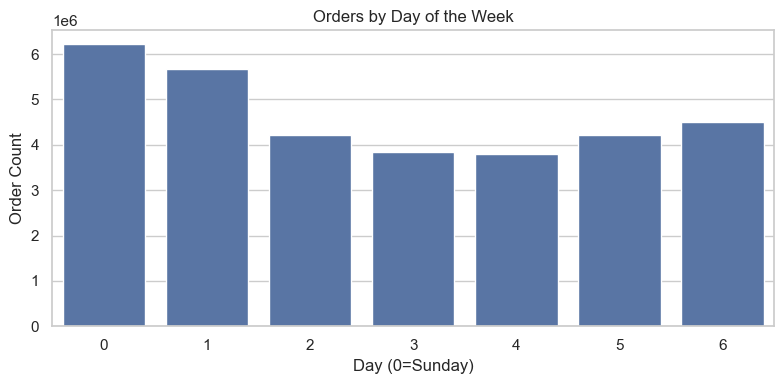

In [16]:
# Orders by Day of the Week
orders_by_dow = merged['order_dow'].value_counts().compute().sort_index()
plt.figure(figsize=(8,4))
sns.barplot(x=orders_by_dow.index, y=orders_by_dow.values)
plt.title("Orders by Day of the Week")
plt.xlabel("Day (0=Sunday)")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

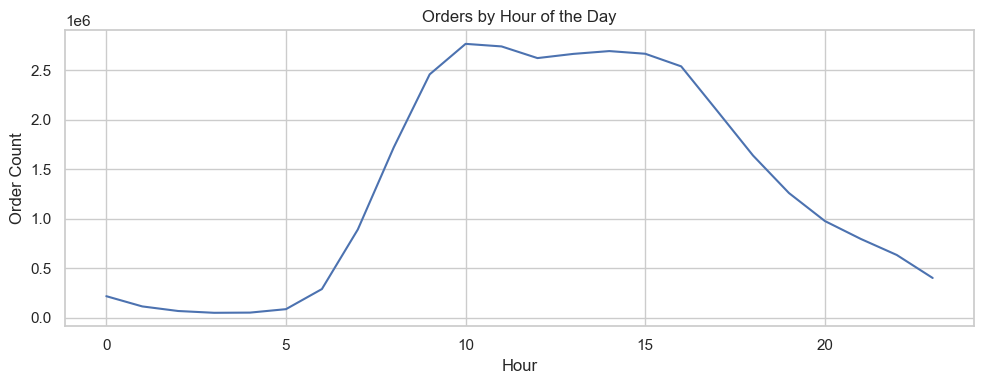

In [17]:
# Orders by Hour of the Day
orders_by_hour = merged['order_hour_of_day'].value_counts().compute().sort_index()
plt.figure(figsize=(10,4))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title("Orders by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

C:\Users\shant\AppData\Local\Temp\ipykernel_27756\2951857465.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_aisles.index, x=top_aisles.values, palette="Blues_d")


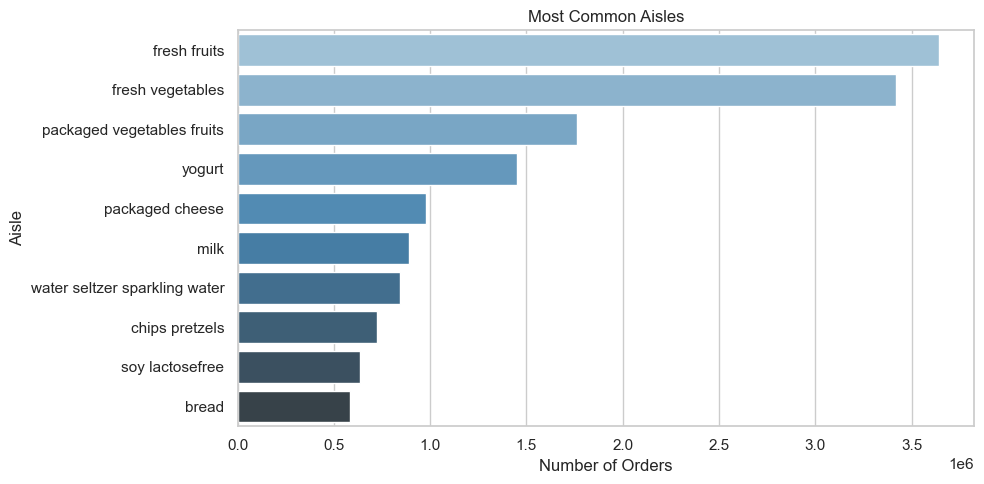

In [18]:
# Top 10 Most Common Aisles
top_aisles = merged['aisle'].value_counts().nlargest(10).compute()
plt.figure(figsize=(10,5))
sns.barplot(y=top_aisles.index, x=top_aisles.values, palette="Blues_d")
plt.title("Most Common Aisles")
plt.xlabel("Number of Orders")
plt.ylabel("Aisle")
plt.tight_layout()
plt.show()

C:\Users\shant\AppData\Local\Temp\ipykernel_27756\3504524582.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_depts.values, y=top_depts.index, palette="Set2")


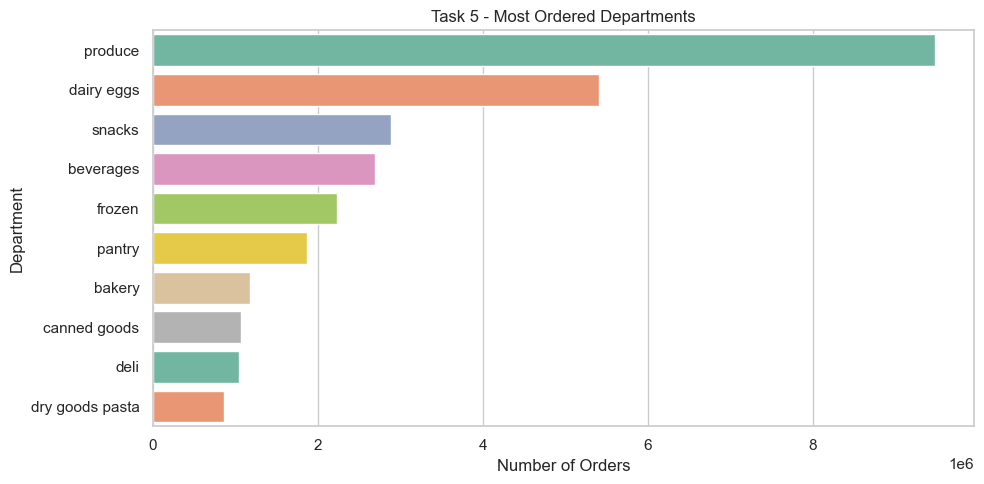

In [10]:
# Top 10 Most Ordered Departments
top_depts = merged['department'].value_counts().nlargest(10).compute()
plt.figure(figsize=(10,5))
sns.barplot(x=top_depts.values, y=top_depts.index, palette="Set2")
plt.title("Task 5 - Most Ordered Departments")
plt.xlabel("Number of Orders")
plt.ylabel("Department")
plt.tight_layout()
plt.show()

C:\Users\shant\AppData\Local\Temp\ipykernel_27756\102527655.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reorder_ratio.values, y=reorder_ratio.index, palette="coolwarm")


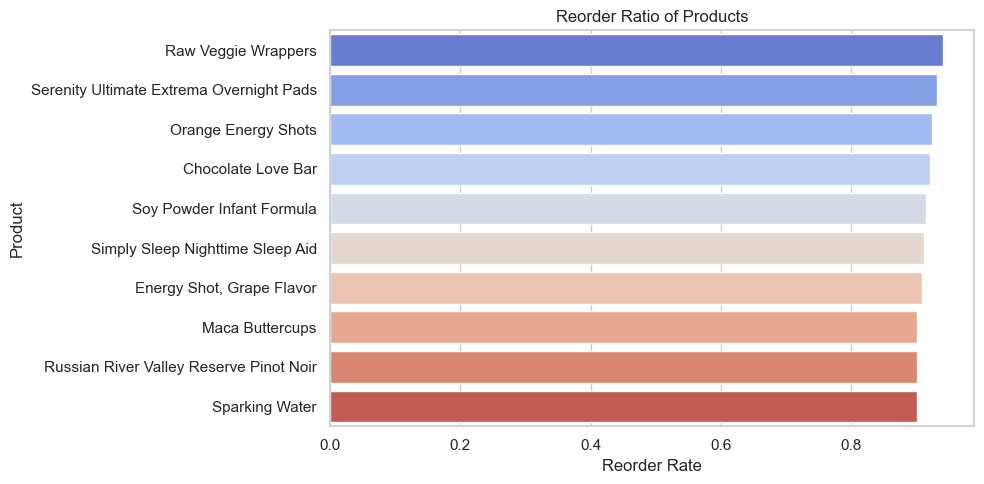

In [19]:
# Reorder Ratio per Product
reorder_ratio = (merged.groupby("product_name")["reordered"].mean().nlargest(10)).compute()
plt.figure(figsize=(10,5))
sns.barplot(x=reorder_ratio.values, y=reorder_ratio.index, palette="coolwarm")
plt.title("Reorder Ratio of Products")
plt.xlabel("Reorder Rate")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

In [20]:
# Most Reordered Products
most_reordered = merged[merged["reordered"] == 1]['product_name'].value_counts().nlargest(10).compute()
print("Most Reordered Products:\n", most_reordered)

Most Reordered Products:
 product_name
Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Organic Avocado           134044
Organic Whole Milk        114510
Large Lemon               106255
Organic Raspberries       105409
Strawberries               99802
Name: count, dtype: int64[pyarrow]


In [21]:
# Average Basket Size
avg_basket_size = merged.groupby('order_id')['add_to_cart_order'].count().mean().compute()
print("Average Basket Size (products per order):", round(avg_basket_size, 2))

Average Basket Size (products per order): 10.09


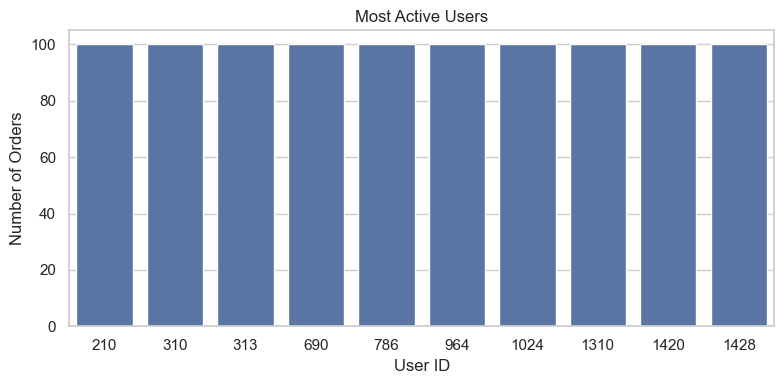

In [14]:
# Most Active Users (by number of orders)
user_order_freq = orders['user_id'].value_counts().nlargest(10).compute()
plt.figure(figsize=(8,4))
sns.barplot(x=user_order_freq.index.astype(str), y=user_order_freq.values)
plt.title("Most Active Users")
plt.xlabel("User ID")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

In [22]:
print("\nAnalysis complete using Dask!")
print("This demonstrates scalable operations like merges, groupings, and visualizations on millions of rows.")


Analysis complete using Dask!
This demonstrates scalable operations like merges, groupings, and visualizations on millions of rows.
